**Importing Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:\\NCSA\\CPRHD')

**Removing "Margin of Error" based columns from every year data as those need not to be considered in modelling**

In [17]:
temp = []
for each in os.listdir('year'):
    df = pd.read_csv(each, low_memory = False)
    for cols in list(df.columns):
        if "Margin of Error" in cols:
            temp.append(cols)
    df.drop(columns = temp, axis = 1, inplace=True)
    temp.clear()
    df.to_csv(each)

**Loading each data separately for removing some columns and comparing each data file with another one to see if they all have consistent columns or not**

In [122]:
data2010 = pd.read_csv('newYears//2010 combined.csv', low_memory = False)
data2011 = pd.read_csv('newYears//2011 combined.csv', low_memory = False)
data2012 = pd.read_csv('newYears//2012 combined.csv', low_memory = False)
data2013 = pd.read_csv('newYears//2013 combined.csv', low_memory = False)
data2014 = pd.read_csv('newYears//2014 combined.csv', low_memory = False)
data2015 = pd.read_csv('newYears//2015 combined.csv', low_memory = False)
data2016 = pd.read_csv('newYears//2016 combined.csv', low_memory = False)
data2017 = pd.read_csv('newYears//2017 combined.csv', low_memory = False)

### Cleaning Process begins

In [163]:
matching = []
result = []
for c in list(data2017.columns):
    if ("income" in c or "Income" in c or "INCOME" in c) and ('2017' in c):
        matching.append(c)
        res = re.sub(r'[\(].*?[\)]\s', '', c)
        result.append(res)

In [164]:
data2017.rename(columns={x:y for x,y in zip(matching, result)}, inplace=True)

In [168]:
data2017.shape

(1535, 733)

In [133]:
data2012.shape

(1535, 733)

**Checking for consistency of each columns in different data files**

In [167]:
for x,y in zip(list(data2010.columns), list(data2017.columns)):
    if x!=y:
        print('data2010: ' + x);print('data2017: ' + y);print('\n')
    else:
        pass

**Assigning same name to each column to maintain the uniformity throughout the data**

In [166]:
a = list(data2017.columns)
b = list(data2010.columns)
data2017.rename(columns={x:y for x,y in zip(a,b)}, inplace=True)

In [111]:
data2010.shape

(1535, 619)

In [119]:
data2010.to_csv("newYears//2010 combined.csv", index = False)
data2011.to_csv("newYears//2011 combined.csv", index = False)
data2012.to_csv("newYears//2012 combined.csv", index = False)
data2013.to_csv("newYears//2013 combined.csv", index = False)
data2014.to_csv("newYears//2014 combined.csv", index = False)
data2015.to_csv("newYears//2015 combined.csv", index = False)
data2016.to_csv("newYears//2016 combined.csv", index = False)
data2017.to_csv("newYears//2017 combined.csv", index = False)

In [225]:
# Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population (6)

# estimate ; under 18 years
# and 16 years one cases

In [235]:
os.listdir('newYears')

['2010 combined.csv',
 '2011 combined.csv',
 '2012 combined.csv',
 '2013 combined.csv',
 '2014 combined.csv',
 '2015 combined.csv',
 '2016 combined.csv',
 '2017 combined.csv']

In [87]:
data2017['Year'] = 2017
data2017.to_csv("newYears//2017 combined.csv", index = False)

**Combining all the data**

In [78]:
all_filename = [i for i in os.listdir('newYears')]
combined_data = pd.concat([pd.read_csv('newYears\\'+f) for f in all_filename])

In [79]:
combined_data.to_csv('final_data.csv', index = False)

In [121]:
combine.to_csv('final_data.csv', index = False)

In [123]:
combine = pd.read_csv('final_data.csv', low_memory = False)

In [124]:
combine.shape

(12280, 502)

In [82]:
objcols = combine.columns.drop(['Id', 'Geography'])

combine[objcols] = combine[objcols].apply(pd.to_numeric, errors='coerce')

**Checking for NaN values in combined data**

In [83]:
percent_missing_df = pd.DataFrame(combine.isna().sum(), columns=['Total NaN'])
percent_missing_df["Percentage of NaN"] = ((percent_missing_df['Total NaN'])/(combine.shape[0])*100)

In [ ]:
percent_missing_df[(percent_missing_df['Percentage of NaN']==0)]

In [52]:
list(colsconsider.index)[1:]

['Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Married couple families - With related children under 18 years - With related children under 5 years only',
 'Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)',
 'Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren',
 'Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - Less than 1 year',
 'Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 1 or 2 years',
 'Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 3 or 4 years',
 'Percent; GRANDPARENTS - Number of grandparents 

In [49]:
data2010[list(colsconsider.index)].describe()

,Estimate; INCOME AND BENEFITS - With Supplemental Security Income - Mean Supplemental Security Income (dollars),Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Married couple families - With related children under 18 years - With related children under 5 years only,"Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)",Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren,Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - Less than 1 year,Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 1 or 2 years,Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 3 or 4 years,Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 5 or more years
count,1342.000000,1340.000000,1406.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,9034.591654,5.700448,33.261664,32.849146,6.669643,7.597205,5.694876,12.888121
std,3975.681676,15.735939,36.776366,29.485556,15.812340,15.682898,13.406029,20.388985
min,1358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6694.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8157.500000,0.000000,20.800000,29.850000,0.000000,0.000000,0.000000,0.000000
75%,10558.500000,0.000000,61.700000,51.900000,5.725000,10.100000,4.600000,19.900000
max,40188.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [104]:
combine.shape

(12280, 554)

In [53]:
combine.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)

In [57]:
data2010.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)
data2011.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)
data2012.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)
data2013.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)
data2014.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)
data2015.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)
data2016.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)
data2017.drop(columns = list(colsconsider.index)[1:], axis = 1, inplace = True)

In [110]:
data2016.shape

(1535, 503)

In [54]:
combine.shape

(12280, 547)

In [61]:
years = [data2010,data2011,data2012,data2013,data2014,data2015,data2016,data2017]
for d in years:
    d.drop(columns = list(drop30.index), axis = 1, inplace = True)

In [43]:
data2010.shape

(1535, 554)

In [76]:
data2010.fillna(data2010.mean(), inplace = True)
data2011.fillna(data2011.mean(), inplace = True)
data2012.fillna(data2012.mean(), inplace = True)
data2013.fillna(data2013.mean(), inplace = True)
data2014.fillna(data2014.mean(), inplace = True)
data2015.fillna(data2015.mean(), inplace = True)
data2016.fillna(data2016.mean(), inplace = True)
data2017.fillna(data2017.mean(), inplace = True)

In [95]:
test1 = combine[['Year', 'Geography', 'Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population']]

In [103]:
test1.sort_values(by='Geography')

,Year,Geography,Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population
146,2010,"Census Tract 1001, Cook County, Illinois",NaN
1681,2011,"Census Tract 1001, Cook County, Illinois",NaN
3216,2012,"Census Tract 1001, Cook County, Illinois",5960.0
6286,2014,"Census Tract 1001, Cook County, Illinois",5666.0
7821,2015,"Census Tract 1001, Cook County, Illinois",5285.0
10891,2017,"Census Tract 1001, Cook County, Illinois",5498.0
4751,2013,"Census Tract 1001, Cook County, Illinois",5989.0
9356,2016,"Census Tract 1001, Cook County, Illinois",5095.0
3217,2012,"Census Tract 1002, Cook County, Illinois",7011.0
6287,2014,"Census Tract 1002, Cook County, Illinois",6422.0


In [139]:
test11 = test1[(test1['Geography'] == 'Census Tract 1001, Cook County, Illinois') | (test1['Geography'] == 'Census Tract 1002, Cook County, Illinois') | (test1['Geography'] == 'Census Tract 1003, Cook County, Illinois')]

In [68]:
test1.groupby(['Geography'])['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population']

In [140]:
test11

,Year,Geography,Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population
146,2010,"Census Tract 1001, Cook County, Illinois",NaN
147,2010,"Census Tract 1002, Cook County, Illinois",NaN
148,2010,"Census Tract 1003, Cook County, Illinois",NaN
1681,2011,"Census Tract 1001, Cook County, Illinois",NaN
1682,2011,"Census Tract 1002, Cook County, Illinois",NaN
1683,2011,"Census Tract 1003, Cook County, Illinois",NaN
3216,2012,"Census Tract 1001, Cook County, Illinois",5960.0
3217,2012,"Census Tract 1002, Cook County, Illinois",7011.0
3218,2012,"Census Tract 1003, Cook County, Illinois",5714.0
4751,2013,"Census Tract 1001, Cook County, Illinois",5989.0


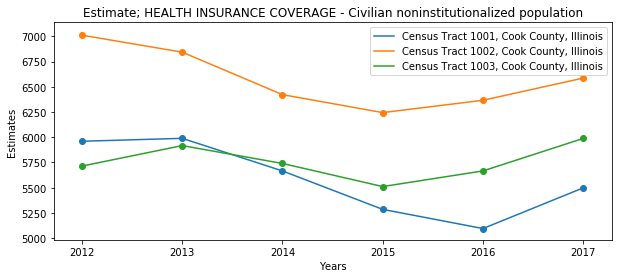

In [142]:
# plt.figure(figsize=(14,8))
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in test11.groupby(['Geography']):
    ax.plot(grp['Year'], grp['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'], label = key)
    ax.scatter(grp['Year'], grp['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'])
ax.legend()
plt.xlabel('Years')
plt.ylabel('Estimates')
plt.title('Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population')
plt.show()

In [145]:
test11.sort_values(by='Geography').head(8)

,Year,Geography,Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population
146,2010,"Census Tract 1001, Cook County, Illinois",NaN
9356,2016,"Census Tract 1001, Cook County, Illinois",5095.0
10891,2017,"Census Tract 1001, Cook County, Illinois",5498.0
1681,2011,"Census Tract 1001, Cook County, Illinois",NaN
6286,2014,"Census Tract 1001, Cook County, Illinois",5666.0
3216,2012,"Census Tract 1001, Cook County, Illinois",5960.0
7821,2015,"Census Tract 1001, Cook County, Illinois",5285.0
4751,2013,"Census Tract 1001, Cook County, Illinois",5989.0


In [162]:
from scipy import interpolate

x = [2012, 2013, 2014, 2015, 2016, 2017]
y = [5960, 5989, 5666, 5285, 5095, 5498]
f = interpolate.interp1d(x, y, fill_value = "extrapolate")
print(f(2010))

5902.0


In [158]:
from scipy.optimize import curve_fit

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

if __name__ == "__main__":
    x = np.array([2012, 2013, 2014, 2015, 2016, 2017])
    y = np.array([5960, 5989, 5666, 5285, 5095, 5498])
    fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
    a, b, c = fitting_parameters

In [160]:
next_y = exponential_fit(2011, a, b, c)

In [159]:
fitting_parameters

array([1.00000000e+00, 1.00000000e+00, 5.58216667e+03])

In [161]:
next_y

5582.166666666667

In [69]:
test1.groupby('Geography')['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'].plot()

Geography
Census Tract 1001, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1002, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1003, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1004, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1005, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1006, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1007, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 101, Cook County, Illinois          AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 102.01, Cook County, Illinois       AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 102.02, Cook County, Illinois       AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 103, Cook County, Illinois          AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 104, Cook County, Illinois          AxesSubplot(0.125

In [69]:
testobjcols = data2013.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])
data2013[testobjcols] = data2013[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2013 = pd.DataFrame(data2013.isna().sum(), columns=['Total NaN'])
missing_df_2013["Percentage of NaN"] = ((missing_df_2013['Total NaN'])/(data2013.shape[0])*100)
missing_df_2013[(missing_df_2013['Percentage of NaN']>5)]

,Total NaN,Percentage of NaN
Estimate; INCOME AND BENEFITS - With Supplemental Security Income - Mean Supplemental Security Income (dollars),96,6.254072
Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Married couple families - With related children under 18 years - With related children under 5 years only,164,10.684039
"Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)",93,6.058632
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren,188,12.247557
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - Less than 1 year,188,12.247557
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 1 or 2 years,188,12.247557
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 3 or 4 years,188,12.247557
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 5 or more years,188,12.247557


In [72]:
testobjcols = data2014.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])
data2014[testobjcols] = data2014[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2014 = pd.DataFrame(data2014.isna().sum(), columns=['Total NaN'])
missing_df_2014["Percentage of NaN"] = ((missing_df_2014['Total NaN'])/(data2014.shape[0])*100)
missing_df_2014[(missing_df_2014['Percentage of NaN']>5)]

,Total NaN,Percentage of NaN
Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Married couple families - With related children under 18 years - With related children under 5 years only,169,11.009772
"Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)",89,5.798046
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren,174,11.335505
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - Less than 1 year,174,11.335505
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 1 or 2 years,174,11.335505
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 3 or 4 years,174,11.335505
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 5 or more years,174,11.335505


In [56]:
testobjcols = data2015.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])
data2015[testobjcols] = data2015[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2015 = pd.DataFrame(data2015.isna().sum(), columns=['Total NaN'])
missing_df_2015["Percentage of NaN"] = ((missing_df_2015['Total NaN'])/(data2015.shape[0])*100)
missing_df_2015[(missing_df_2015['Percentage of NaN']>20)]

,Total NaN,Percentage of NaN
Estimate; INCOME AND BENEFITS - With Supplemental Security Income - Mean Supplemental Security Income (dollars),337,21.954397
Estimate; INCOME AND BENEFITS - With cash public assistance income - Mean cash public assistance income (dollars),652,42.475570
Estimate; INCOME AND BENEFITS - Median earnings for workers (dollars),378,24.625407
"Estimate; INCOME AND BENEFITS - Median earnings for male full-time, year-round workers (dollars)",378,24.625407
"Estimate; INCOME AND BENEFITS - Median earnings for female full-time, year-round workers (dollars)",378,24.625407
"Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Families with female householder, no husband present - With related children under 18 years - With related children under 5 years only",551,35.895765
Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years - Who are female,499,32.508143
Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years - Who are married,499,32.508143


In [57]:
testobjcols = data2016.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])
data2016[testobjcols] = data2016[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2016 = pd.DataFrame(data2016.isna().sum(), columns=['Total NaN'])
missing_df_2016["Percentage of NaN"] = ((missing_df_2016['Total NaN'])/(data2016.shape[0])*100)
missing_df_2016[(missing_df_2016['Percentage of NaN']>20)]

,Total NaN,Percentage of NaN
Estimate; INCOME AND BENEFITS - With Supplemental Security Income - Mean Supplemental Security Income (dollars),319,20.781759
Estimate; INCOME AND BENEFITS - With cash public assistance income - Mean cash public assistance income (dollars),665,43.322476
"Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Families with female householder, no husband present - With related children under 18 years - With related children under 5 years only",586,38.175896
Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years - Who are female,502,32.703583
Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years - Who are married,502,32.703583


In [60]:
testobjcols = data2017.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])
data2017[testobjcols] = data2017[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2017 = pd.DataFrame(data2017.isna().sum(), columns=['Total NaN'])
missing_df_2017["Percentage of NaN"] = ((missing_df_2017['Total NaN'])/(data2017.shape[0])*100)
drop30 = missing_df_2017[(missing_df_2017['Percentage of NaN']>30)]

In [98]:
testobjcols = data2012.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])
data2012[testobjcols] = data2012[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2012 = pd.DataFrame(data2012.isna().sum(), columns=['Total NaN'])
missing_df_2012["Percentage of NaN"] = ((missing_df_2012['Total NaN'])/(data2012.shape[0])*100)

In [99]:
missing_df_2012[(missing_df_2012['Percentage of NaN']>5)]

,Total NaN,Percentage of NaN
Estimate; INCOME AND BENEFITS - With Supplemental Security Income - Mean Supplemental Security Income (dollars),115,7.491857
Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Married couple families - With related children under 18 years - With related children under 5 years only,177,11.530945
"Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)",91,5.928339
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren,208,13.550489
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - Less than 1 year,208,13.550489
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 1 or 2 years,208,13.550489
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 3 or 4 years,208,13.550489
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 5 or more years,208,13.550489


In [96]:
testobjcols = data2011.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])
data2011[testobjcols] = data2011[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2011 = pd.DataFrame(data2011.isna().sum(), columns=['Total NaN'])
missing_df_2011["Percentage of NaN"] = ((missing_df_2011['Total NaN'])/(data2011.shape[0])*100)

In [97]:
missing_df_2011[(missing_df_2011['Percentage of NaN']>5)]

,Total NaN,Percentage of NaN
Estimate; INCOME AND BENEFITS - With Supplemental Security Income - Mean Supplemental Security Income (dollars),174,11.335505
Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Married couple families - With related children under 18 years - With related children under 5 years only,186,12.117264
"Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)",114,7.426710
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren,225,14.657980
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - Less than 1 year,225,14.657980
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 1 or 2 years,225,14.657980
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 3 or 4 years,225,14.657980
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 5 or more years,225,14.657980


In [16]:
testobjcols = data2010.columns.drop(['Id', 'Geography'])
data2010[testobjcols] = data2010[testobjcols].apply(pd.to_numeric, errors='coerce')
missing_df_2010 = pd.DataFrame(data2010.isna().sum(), columns=['Total NaN'])
missing_df_2010["Percentage of NaN"] = ((missing_df_2010['Total NaN'])/(data2010.shape[0])*100)

In [17]:
data2010.shape

(1535, 619)

In [18]:
missing_df_2010[(missing_df_2010['Percentage of NaN']>5)]

,Total NaN,Percentage of NaN
Geography_x,1535,100.000000
Estimate; INCOME AND BENEFITS - With Supplemental Security Income - Mean Supplemental Security Income (dollars),193,12.573290
Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - Married couple families - With related children under 18 years - With related children under 5 years only,195,12.703583
Geography_y,1535,100.000000
"Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)",129,8.403909
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren,247,16.091205
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - Less than 1 year,247,16.091205
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 1 or 2 years,247,16.091205
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 3 or 4 years,247,16.091205
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Years responsible for grandchildren - 5 or more years,247,16.091205


In [63]:
combine.drop(columns = list(drop30.index), axis = 1, inplace = True)

In [108]:
combine.shape

(12280, 554)

In [83]:
combine = combine.T.drop_duplicates(keep='first')

In [85]:
combine = combine.T

In [92]:
combine.sample(5)

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,...,Percent; ANCESTRY - Total population - Swedish,Estimate; ANCESTRY - Total population - Swiss,Percent; ANCESTRY - Total population - Swiss,Estimate; ANCESTRY - Total population - Ukrainian,Percent; ANCESTRY - Total population - Ukrainian,Estimate; ANCESTRY - Total population - Welsh,Percent; ANCESTRY - Total population - Welsh,Estimate; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups),Percent; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups),Year
4946,1400000US17031260900,17031260900,"Census Tract 2609, Cook County, Illinois",1777,894,50.3,883,49.7,208,11.7,...,0,0,0,0,0,0,0,0,0,2013
2648,1400000US17031824602,17031824602,"Census Tract 8246.02, Cook County, Illinois",6552,3134,47.8,3418,52.2,562,8.6,...,3.9,0,0,8,0.1,0,0,0,0,2011
221,1400000US17031190402,17031190402,"Census Tract 1904.02, Cook County, Illinois",5392,2750,51,2642,49,652,12.1,...,0,11,0.2,82,1.5,0,0,0,0,2010
1063,1400000US17031823001,17031823001,"Census Tract 8230.01, Cook County, Illinois",6646,3398,51.1,3248,48.9,520,7.8,...,1.7,0,0,0,0,25,0.4,0,0,2010
10096,1400000US17031808400,17031808400,"Census Tract 8084, Cook County, Illinois",4473,2106,47.1,2367,52.9,344,7.7,...,0.5,11,0.2,106,2.4,0,0,37,0.8,2016


In [82]:
combine.T[combine.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279
Percent; SEX AND AGE - Total population,5303,5924,2981,6475,4651,4138,3294,1778,6563,3734,...,3450,2901,5227,3974,2777,4784,4208,3745,4646,4148
Estimate; SEX AND AGE - 18 years and over.1,3724,4283,2289,5222,4156,3394,2985,1690,5299,2896,...,2552,2215,3908,2930,2087,3546,2854,2883,3395,3239
Percent; SEX AND AGE - 18 years and over.1,3724,4283,2289,5222,4156,3394,2985,1690,5299,2896,...,2552,2215,3908,2930,2087,3546,2854,2883,3395,3239
Estimate; SEX AND AGE - 65 years and over.1,352,349,339,1112,325,322,168,422,482,194,...,244,238,578,152,490,655,219,462,411,489
Percent; SEX AND AGE - 65 years and over.1,352,349,339,1112,325,322,168,422,482,194,...,244,238,578,152,490,655,219,462,411,489
Estimate; RACE - Total population,5303,5924,2981,6475,4651,4138,3294,1778,6563,3734,...,3450,2901,5227,3974,2777,4784,4208,3745,4646,4148
Percent; RACE - Total population,5303,5924,2981,6475,4651,4138,3294,1778,6563,3734,...,3450,2901,5227,3974,2777,4784,4208,3745,4646,4148
Estimate; RACE - One race,5020,5794,2828,6363,4524,4065,3016,1750,6287,3584,...,3214,2786,4908,3686,2732,4699,4091,3702,4489,3938
Percent; RACE - One race,94.7,97.8,94.9,98.3,97.3,98.2,91.6,98.4,95.8,96,...,93.2,96,93.9,92.8,98.4,98.2,97.2,98.9,96.6,94.9
Estimate; RACE - Two or more races,283,130,153,112,127,73,278,28,276,150,...,236,115,319,288,45,85,117,43,157,210


In [22]:
combine

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,...,Percent; ANCESTRY - Total population - Swedish,Estimate; ANCESTRY - Total population - Swiss,Percent; ANCESTRY - Total population - Swiss,Estimate; ANCESTRY - Total population - Ukrainian,Percent; ANCESTRY - Total population - Ukrainian,Estimate; ANCESTRY - Total population - Welsh,Percent; ANCESTRY - Total population - Welsh,Estimate; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups),Percent; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups),Year
0,1400000US17031010100,17031010100,"Census Tract 101, Cook County, Illinois",5303,2157,40.7,3146,59.3,598,11.3,...,1.3,11,0.2,0,0.0,0,0.0,182,3.4,2010
1,1400000US17031010201,17031010201,"Census Tract 102.01, Cook County, Illinois",5924,2849,48.1,3075,51.9,604,10.2,...,1.3,0,0.0,79,1.3,0,0.0,343,5.8,2010
2,1400000US17031010202,17031010202,"Census Tract 102.02, Cook County, Illinois",2981,1486,49.8,1495,50.2,298,10.0,...,0.9,0,0.0,0,0.0,0,0.0,253,8.5,2010
3,1400000US17031010300,17031010300,"Census Tract 103, Cook County, Illinois",6475,3387,52.3,3088,47.7,475,7.3,...,0.9,13,0.2,66,1.0,11,0.2,130,2.0,2010
4,1400000US17031010400,17031010400,"Census Tract 104, Cook County, Illinois",4651,2180,46.9,2471,53.1,221,4.8,...,2.4,16,0.3,0,0.0,101,2.2,0,0.0,2010
5,1400000US17031010501,17031010501,"Census Tract 105.01, Cook County, Illinois",4138,2029,49.0,2109,51.0,235,5.7,...,1.1,15,0.4,63,1.5,0,0.0,88,2.1,2010
6,1400000US17031010502,17031010502,"Census Tract 105.02, Cook County, Illinois",3294,1688,51.2,1606,48.8,194,5.9,...,1.0,11,0.3,0,0.0,68,2.1,8,0.2,2010
7,1400000US17031010503,17031010503,"Census Tract 105.03, Cook County, Illinois",1778,690,38.8,1088,61.2,14,0.8,...,2.1,0,0.0,21,1.2,37,2.1,23,1.3,2010
8,1400000US17031010600,17031010600,"Census Tract 106, Cook County, Illinois",6563,3351,51.1,3212,48.9,461,7.0,...,2.6,41,0.6,17,0.3,49,0.7,128,2.0,2010
9,1400000US17031010701,17031010701,"Census Tract 107.01, Cook County, Illinois",3734,1909,51.1,1825,48.9,224,6.0,...,0.0,13,0.3,0,0.0,0,0.0,0,0.0,2010


In [19]:
data2010 = data2010.T.drop_duplicates(keep='first').T

In [21]:
data2010

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,...,Percent; ANCESTRY - Total population - Swedish,Estimate; ANCESTRY - Total population - Swiss,Percent; ANCESTRY - Total population - Swiss,Estimate; ANCESTRY - Total population - Ukrainian,Percent; ANCESTRY - Total population - Ukrainian,Estimate; ANCESTRY - Total population - Welsh,Percent; ANCESTRY - Total population - Welsh,Estimate; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups),Percent; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups),Year
0,1400000US17031010100,17031010100,"Census Tract 101, Cook County, Illinois",5303,2157,40.7,3146,59.3,598,11.3,...,1.3,11,0.2,0,0,0,0,182,3.4,2010
1,1400000US17031010201,17031010201,"Census Tract 102.01, Cook County, Illinois",5924,2849,48.1,3075,51.9,604,10.2,...,1.3,0,0,79,1.3,0,0,343,5.8,2010
2,1400000US17031010202,17031010202,"Census Tract 102.02, Cook County, Illinois",2981,1486,49.8,1495,50.2,298,10,...,0.9,0,0,0,0,0,0,253,8.5,2010
3,1400000US17031010300,17031010300,"Census Tract 103, Cook County, Illinois",6475,3387,52.3,3088,47.7,475,7.3,...,0.9,13,0.2,66,1,11,0.2,130,2,2010
4,1400000US17031010400,17031010400,"Census Tract 104, Cook County, Illinois",4651,2180,46.9,2471,53.1,221,4.8,...,2.4,16,0.3,0,0,101,2.2,0,0,2010
5,1400000US17031010501,17031010501,"Census Tract 105.01, Cook County, Illinois",4138,2029,49,2109,51,235,5.7,...,1.1,15,0.4,63,1.5,0,0,88,2.1,2010
6,1400000US17031010502,17031010502,"Census Tract 105.02, Cook County, Illinois",3294,1688,51.2,1606,48.8,194,5.9,...,1,11,0.3,0,0,68,2.1,8,0.2,2010
7,1400000US17031010503,17031010503,"Census Tract 105.03, Cook County, Illinois",1778,690,38.8,1088,61.2,14,0.8,...,2.1,0,0,21,1.2,37,2.1,23,1.3,2010
8,1400000US17031010600,17031010600,"Census Tract 106, Cook County, Illinois",6563,3351,51.1,3212,48.9,461,7,...,2.6,41,0.6,17,0.3,49,0.7,128,2,2010
9,1400000US17031010701,17031010701,"Census Tract 107.01, Cook County, Illinois",3734,1909,51.1,1825,48.9,224,6,...,0,13,0.3,0,0,0,0,0,0,2010


In [23]:
data2011 = data2011.T.drop_duplicates(keep='first').T

In [25]:
data2011.shape

(1535, 554)

In [26]:
data2012 = data2012.T.drop_duplicates(keep='first').T

In [27]:
data2012.shape

(1535, 554)

In [28]:
data2013 = data2013.T.drop_duplicates(keep='first').T
data2013.shape

(1535, 554)

In [29]:
data2014 = data2014.T.drop_duplicates(keep='first').T
data2014.shape

(1535, 554)

In [30]:
data2015 = data2015.T.drop_duplicates(keep='first').T
data2015.shape

(1535, 554)

In [31]:
data2016 = data2016.T.drop_duplicates(keep='first').T
data2016.shape

(1535, 554)

In [32]:
data2017 = data2017.T.drop_duplicates(keep='first').T
data2017.shape

(1535, 554)

In [40]:
for x,y in zip(list(data2017.columns), list(combine.columns)):
    if x!=y:
        print('data2010: ' + x);print('combine: ' + y);print('\n')
    else:
        pass

In [34]:
data2010.drop(columns = ['Geography_x'], axis = 1, inplace = True)

In [112]:
data2010.shape

(1535, 547)

In [126]:
testobjcols = combine.columns.drop(['Id', 'Id2', 'Geography','Year'])
combine[testobjcols].describe()

,Estimate; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,Estimate; SEX AND AGE - 5 to 9 years,Percent; SEX AND AGE - 5 to 9 years,Estimate; SEX AND AGE - 10 to 14 years,...,Estimate; ANCESTRY - Total population - Swedish,Percent; ANCESTRY - Total population - Swedish,Estimate; ANCESTRY - Total population - Swiss,Percent; ANCESTRY - Total population - Swiss,Estimate; ANCESTRY - Total population - Ukrainian,Percent; ANCESTRY - Total population - Ukrainian,Estimate; ANCESTRY - Total population - Welsh,Percent; ANCESTRY - Total population - Welsh,Estimate; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups),Percent; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups)
count,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,...,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000
mean,3996.950733,1940.097476,48.316651,2056.853257,51.683381,258.407329,6.493012,254.435749,6.318362,259.941775,...,64.893078,1.527462,7.093485,0.174251,23.354723,0.555850,10.954560,0.271576,15.046498,0.381965
std,1736.592223,881.072259,4.268224,892.904842,4.268215,156.287102,2.755057,156.798734,2.762027,163.401595,...,77.605278,1.658869,15.508822,0.379664,48.778226,1.283671,20.390588,0.496708,46.511723,1.031623
min,0.000000,0.000000,2.600000,0.000000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2739.750000,1316.750000,46.000000,1400.000000,49.100000,147.000000,4.600000,135.000000,4.600000,134.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3912.500000,1891.500000,48.500000,2013.000000,51.500000,231.000000,6.300000,234.000000,6.300000,240.500000,...,40.000000,1.100000,0.000000,0.000000,5.000000,0.100000,0.000000,0.000000,0.000000,0.000000
75%,5114.500000,2482.000000,50.900000,2633.000000,54.000000,340.000000,8.100000,349.000000,8.000000,359.000000,...,97.250000,2.400000,9.000000,0.200000,28.000000,0.700000,15.000000,0.400000,12.000000,0.300000
max,19015.000000,10953.000000,89.600000,10122.000000,97.400000,1341.000000,23.500000,1157.000000,36.400000,1107.000000,...,634.000000,12.900000,342.000000,7.600000,997.000000,34.600000,394.000000,7.200000,1168.000000,19.300000


In [94]:
combine.columns

Index(['Id', 'Id2', 'Geography', 'Estimate; SEX AND AGE - Total population',
       'Estimate; SEX AND AGE - Total population - Male',
       'Percent; SEX AND AGE - Total population - Male',
       'Estimate; SEX AND AGE - Total population - Female',
       'Percent; SEX AND AGE - Total population - Female',
       'Estimate; SEX AND AGE - Under 5 years',
       'Percent; SEX AND AGE - Under 5 years',
       ...
       'Percent; ANCESTRY - Total population - Swedish',
       'Estimate; ANCESTRY - Total population - Swiss',
       'Percent; ANCESTRY - Total population - Swiss',
       'Estimate; ANCESTRY - Total population - Ukrainian',
       'Percent; ANCESTRY - Total population - Ukrainian',
       'Estimate; ANCESTRY - Total population - Welsh',
       'Percent; ANCESTRY - Total population - Welsh',
       'Estimate; ANCESTRY - Total population - West Indian (excluding Hispanic origin groups)',
       'Percent; ANCESTRY - Total population - West Indian (excluding Hispanic origin gr

In [136]:
zeroper = []
for i in list(testobjcols):
    p1 = combine[i].quantile(0.25)
    p2 = combine[i].quantile(0.50)
    p3 = combine[i].quantile(0.75)
    if p1==p2==0:
        zeroper.append(i)
    else:
        pass
        

In [137]:
zeroper

['Estimate; RACE - One race - American Indian and Alaska Native',
 'Percent; RACE - One race - American Indian and Alaska Native',
 'Estimate; RACE - One race - Asian - Japanese',
 'Percent; RACE - One race - Asian - Japanese',
 'Estimate; RACE - One race - Asian - Korean',
 'Percent; RACE - One race - Asian - Korean',
 'Estimate; RACE - One race - Asian - Other Asian',
 'Percent; RACE - One race - Asian - Other Asian',
 'Estimate; RACE - Two or more races - White and American Indian and Alaska Native',
 'Percent; RACE - Two or more races - White and American Indian and Alaska Native',
 'Estimate; RACE - Two or more races - White and Asian',
 'Percent; RACE - Two or more races - White and Asian',
 'Estimate; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Cuban',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Cuban',
 'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELO

In [117]:
combine.drop(columns = zeroper, axis = 1, inplace = True)
data2010.drop(columns = zeroper, axis = 1, inplace = True)
data2011.drop(columns = zeroper, axis = 1, inplace = True)
data2012.drop(columns = zeroper, axis = 1, inplace = True)
data2013.drop(columns = zeroper, axis = 1, inplace = True)
data2014.drop(columns = zeroper, axis = 1, inplace = True)
data2015.drop(columns = zeroper, axis = 1, inplace = True)
data2016.drop(columns = zeroper, axis = 1, inplace = True)
data2017.drop(columns = zeroper, axis = 1, inplace = True)

In [118]:
combine.shape

(12280, 502)